In [106]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow
import keras
import numpy as np
import math


In [51]:
from keras.datasets import cifar10

In [203]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [204]:
normalize = True
if normalize:
    x_train = np.float32(x_train) / 255.
    x_test = np.float32(x_test) / 255.
    y_train = np.float32(y_train) / 255.
    y_test = np.float32(y_test) / 255.

In [205]:

M = 500 # first M principal components

# sample n_images digits from train dataset
whole_train_set = True
if whole_train_set:
    n_images = len(x_train)
    images = x_train
else:
    n_images = 10000
    indexes = np.random.randint(0, x_train.shape[0], size=n_images)
    images = x_train[indexes]

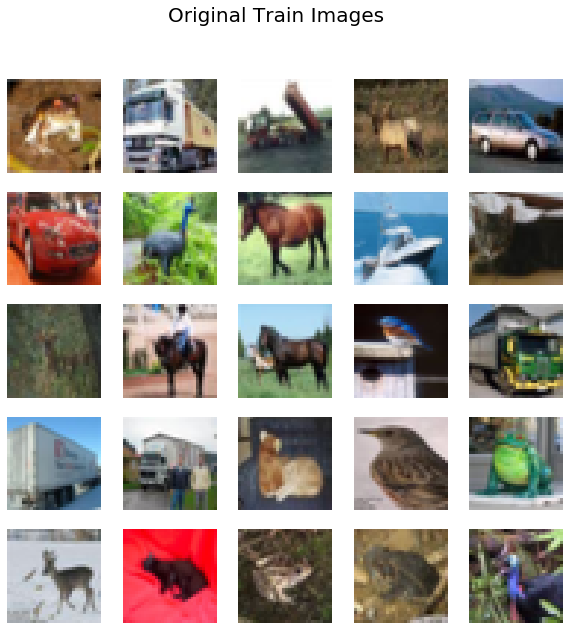

In [206]:
#util function for displaying images in a grid
def plot_images(images, title, n_images=25):
    plt.figure(figsize=(10,10))
    plt.suptitle(title, fontsize=20)
    side = int(math.sqrt(n_images))
    for i in range(n_images):
        plt.subplot(side, side, i + 1)
        image = images[i]
        plt.imshow(image, cmap='gray')
        plt.axis('off')

    plt.show()
    plt.close('all')
    
title = "Original Train Images"
plot_images(images, title=title)
orig_shape = images.shape

# PCA ALGORITHM

In [207]:
#mean subtraction
images = np.float32(images)
mu = np.mean(images)
images -= mu

In [208]:
#divide by standard deviation
std = np.std(images)
images /= std

In [209]:
print("Before mean: {0}, std: {1}".format(mu,std))
mu1 = np.mean(images)
std1 = np.std(images)
print("After mean: {0}, std: {1}".format(mu1,std1))

Before mean: 0.4733648896217346, std: 0.25156915187835693
After mean: -7.477317012671847e-06, std: 0.9999995827674866


### Formulate data matrix and covariance matrix 

In [210]:
#from numpy import linalg as la
from scipy import linalg as la

X = np.reshape(images,(-1,n_images))
S = np.matmul(X, np.transpose(X))/n_images
#D,B = la.eig(S,left=True,right=True)
D,B = la.eig(S,left=True,right=False)
print('X.shape: {0}'.format(X.shape))
print('S.shape: {0}'.format(S.shape))
print(B.shape)
print(D.shape)


X.shape: (3072, 50000)
S.shape: (3072, 3072)
(3072, 3072)
(3072,)


### Projection or Low-Rank Approximation of $\textbf{X}$:

In [211]:
BM = B[:,:M]
BM_BMT = np.matmul(BM,np.transpose(BM))
R = np.matmul(BM_BMT,X)
R = np.reshape(R, orig_shape)
print(R.shape)

(50000, 32, 32, 3)


### Backprojection:

In [212]:
R *= std
R += mu
R = np.clip(R, 0, 255)
mu1 = np.mean(R)
std1 = np.std(R)
print("After PCA mean: {0}, std: {1}".format(mu1,std1))

After PCA mean: 0.4736812114715576, std: 0.22465752065181732


### Plot the images with $\begin{equation}\textit{M}\end{equation}$ principal components

In [213]:
print("Before mean: {0}, std: {1}".format(mu,std))
mu1 = np.mean(R)
std1 = np.std(R)
print("After mean: {0}, std: {1}".format(mu1,std1))

Before mean: 0.4733648896217346, std: 0.25156915187835693
After mean: 0.4736812114715576, std: 0.22465752065181732


### Apply PCA on Test Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

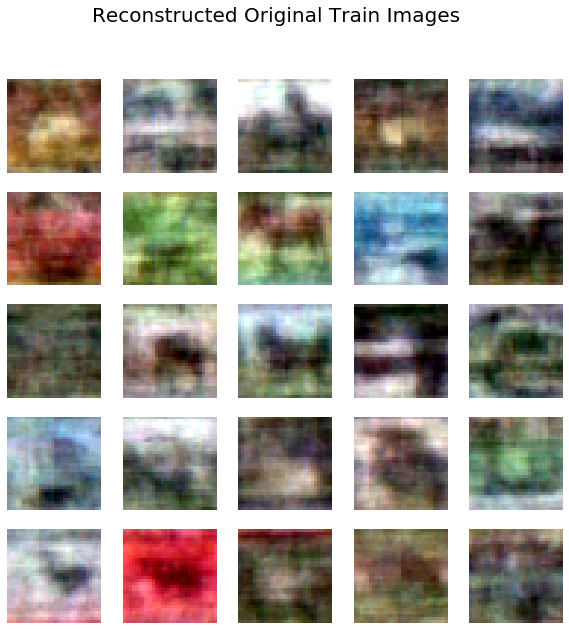

In [214]:
title = "Reconstructed Original Train Images"
plot_images(R, title=title)

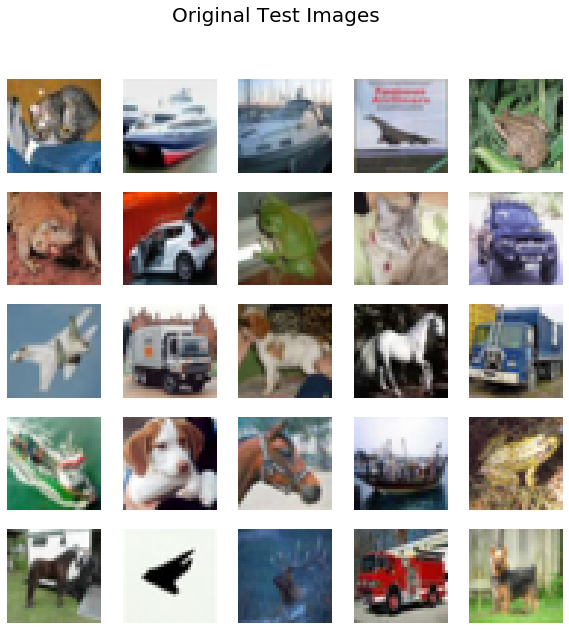

In [202]:
title = "Original Test Images"
plot_images(x_test, title=title)
test_shape = x_test.shape

### Plot reconstructed test images

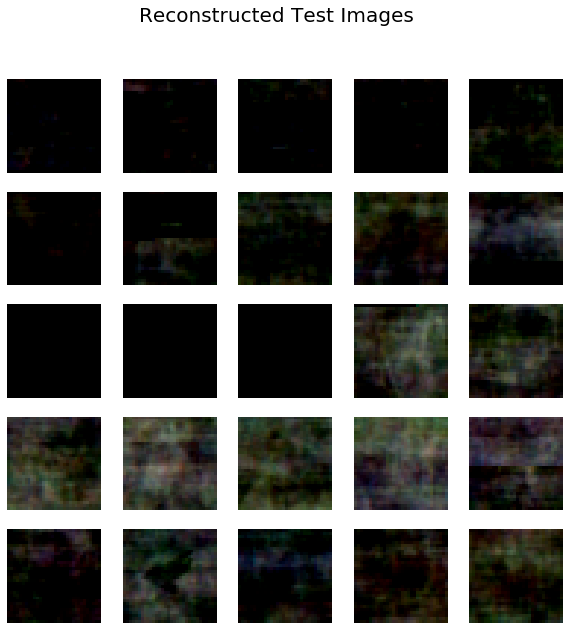

In [215]:
X = np.float32(np.reshape(x_test,(-1,x_test.shape[0])))
R = np.matmul(BM_BMT,X)
R = np.reshape(R, test_shape)
R = np.clip(R, 0, 255)
title = "Reconstructed Test Images"
plot_images(R, title=title)

In [77]:
print('Training data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [78]:
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [79]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


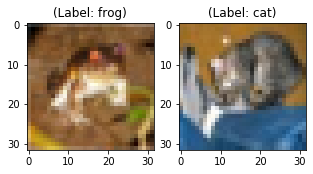

In [82]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

In [87]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [88]:
normalize = True
if normalize:
    x_train = np.float32(x_train) / 255.
    x_test = np.float32(x_test) / 255.
    y_train = np.float32(y_train) / 255.
    y_test = np.float32(y_test) / 255.

In [89]:
np.min(x_train),np.max(x_train)

(0.0, 0.003921569)

In [90]:
np.min(x_train),np.max(x_train)

(0.0, 0.003921569)

In [91]:
x_train.shape

(50000, 32, 32, 3)

In [92]:
x_train_flat = x_train.reshape(-1,3072)

In [93]:
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]

In [95]:
import pandas as pd

In [96]:
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)

In [97]:
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


In [98]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.000907,0.000953,0.000969,0.000661,0.000707,0.000692,0.000769,0.000738,0.000661,0.001046,...,0.003322,0.002830,0.002153,0.002322,0.001815,0.001292,0.001892,0.001415,0.001107,0.023529
1,0.002368,0.002722,0.002876,0.001938,0.002107,0.002092,0.001615,0.001599,0.001461,0.001569,...,0.002199,0.002045,0.002138,0.002199,0.002061,0.002184,0.002199,0.002045,0.002215,0.035294
2,0.003922,0.003922,0.003922,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,...,0.001200,0.001307,0.001276,0.001215,0.001307,0.001276,0.001230,0.001323,0.001292,0.035294
3,0.000431,0.000384,0.000154,0.000569,0.000523,0.000292,0.000584,0.000538,0.000308,0.000646,...,0.000830,0.000723,0.000431,0.000969,0.000861,0.000569,0.001107,0.001000,0.000707,0.015686
4,0.002614,0.002768,0.003045,0.002584,0.002737,0.003014,0.002722,0.002845,0.003122,0.002814,...,0.001153,0.001215,0.001261,0.001092,0.001153,0.001200,0.001123,0.001184,0.001230,0.003922
